In [1]:
#Import Libraries and Load the Dataset

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV


In [2]:
# Load the dataset
df = pd.read_csv('./Cancer_Data.csv')

# Display the first few rows of the dataset
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [3]:
# To get all column names
df.columns


Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

col Unnamed: 32 contain all NaN. This could be removed from dataset

In [5]:
# Get the number of columns
df.shape[1]

33

In [6]:
# To check if there are any missing values in each column
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

No missing value in dataset

In [8]:
# Find duplicate rows (returns a boolean series indicating whether each row is a duplicate)
duplicates = df.duplicated()

# Count the number of duplicate rows
df.duplicated().sum()

0

No duplicates found in the dataset

In [10]:
# Check the data types of the columns
df.dtypes


id                           int64
diagnosis                   object
radius_mean                float64
texture_mean               float64
perimeter_mean             float64
area_mean                  float64
smoothness_mean            float64
compactness_mean           float64
concavity_mean             float64
concave points_mean        float64
symmetry_mean              float64
fractal_dimension_mean     float64
radius_se                  float64
texture_se                 float64
perimeter_se               float64
area_se                    float64
smoothness_se              float64
compactness_se             float64
concavity_se               float64
concave points_se          float64
symmetry_se                float64
fractal_dimension_se       float64
radius_worst               float64
texture_worst              float64
perimeter_worst            float64
area_worst                 float64
smoothness_worst           float64
compactness_worst          float64
concavity_worst     

 In this dataset there is only one categorial variable "diagnosis". The rest of the columns are numerical variables.

In [12]:
# Get the unique values in the 'diagnosis' column
df['diagnosis'].unique()

array(['M', 'B'], dtype=object)

This shows distinct values present in the diagnosis column, helping us to understand the categories (such as 'M' for Malignant and 'B' for Benign).

In [14]:
# Display the first few rows of the dataset for further explotation of dataset 
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [15]:
# checked Cloumn "Unnamed: 32" to see whether it has any meaning full data
df['Unnamed: 32'].unique()

array([nan])

Column "Unnamed: 32" contains only missing values (NaN) throughout the dataset. In this case, the column has no meaningful data and can be safely dropped from the DataFrame.

In [17]:
# Get summary statistics (mean, min, max, etc.) for numerical columns to check data distribution
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


<Figure size 2000x1500 with 0 Axes>

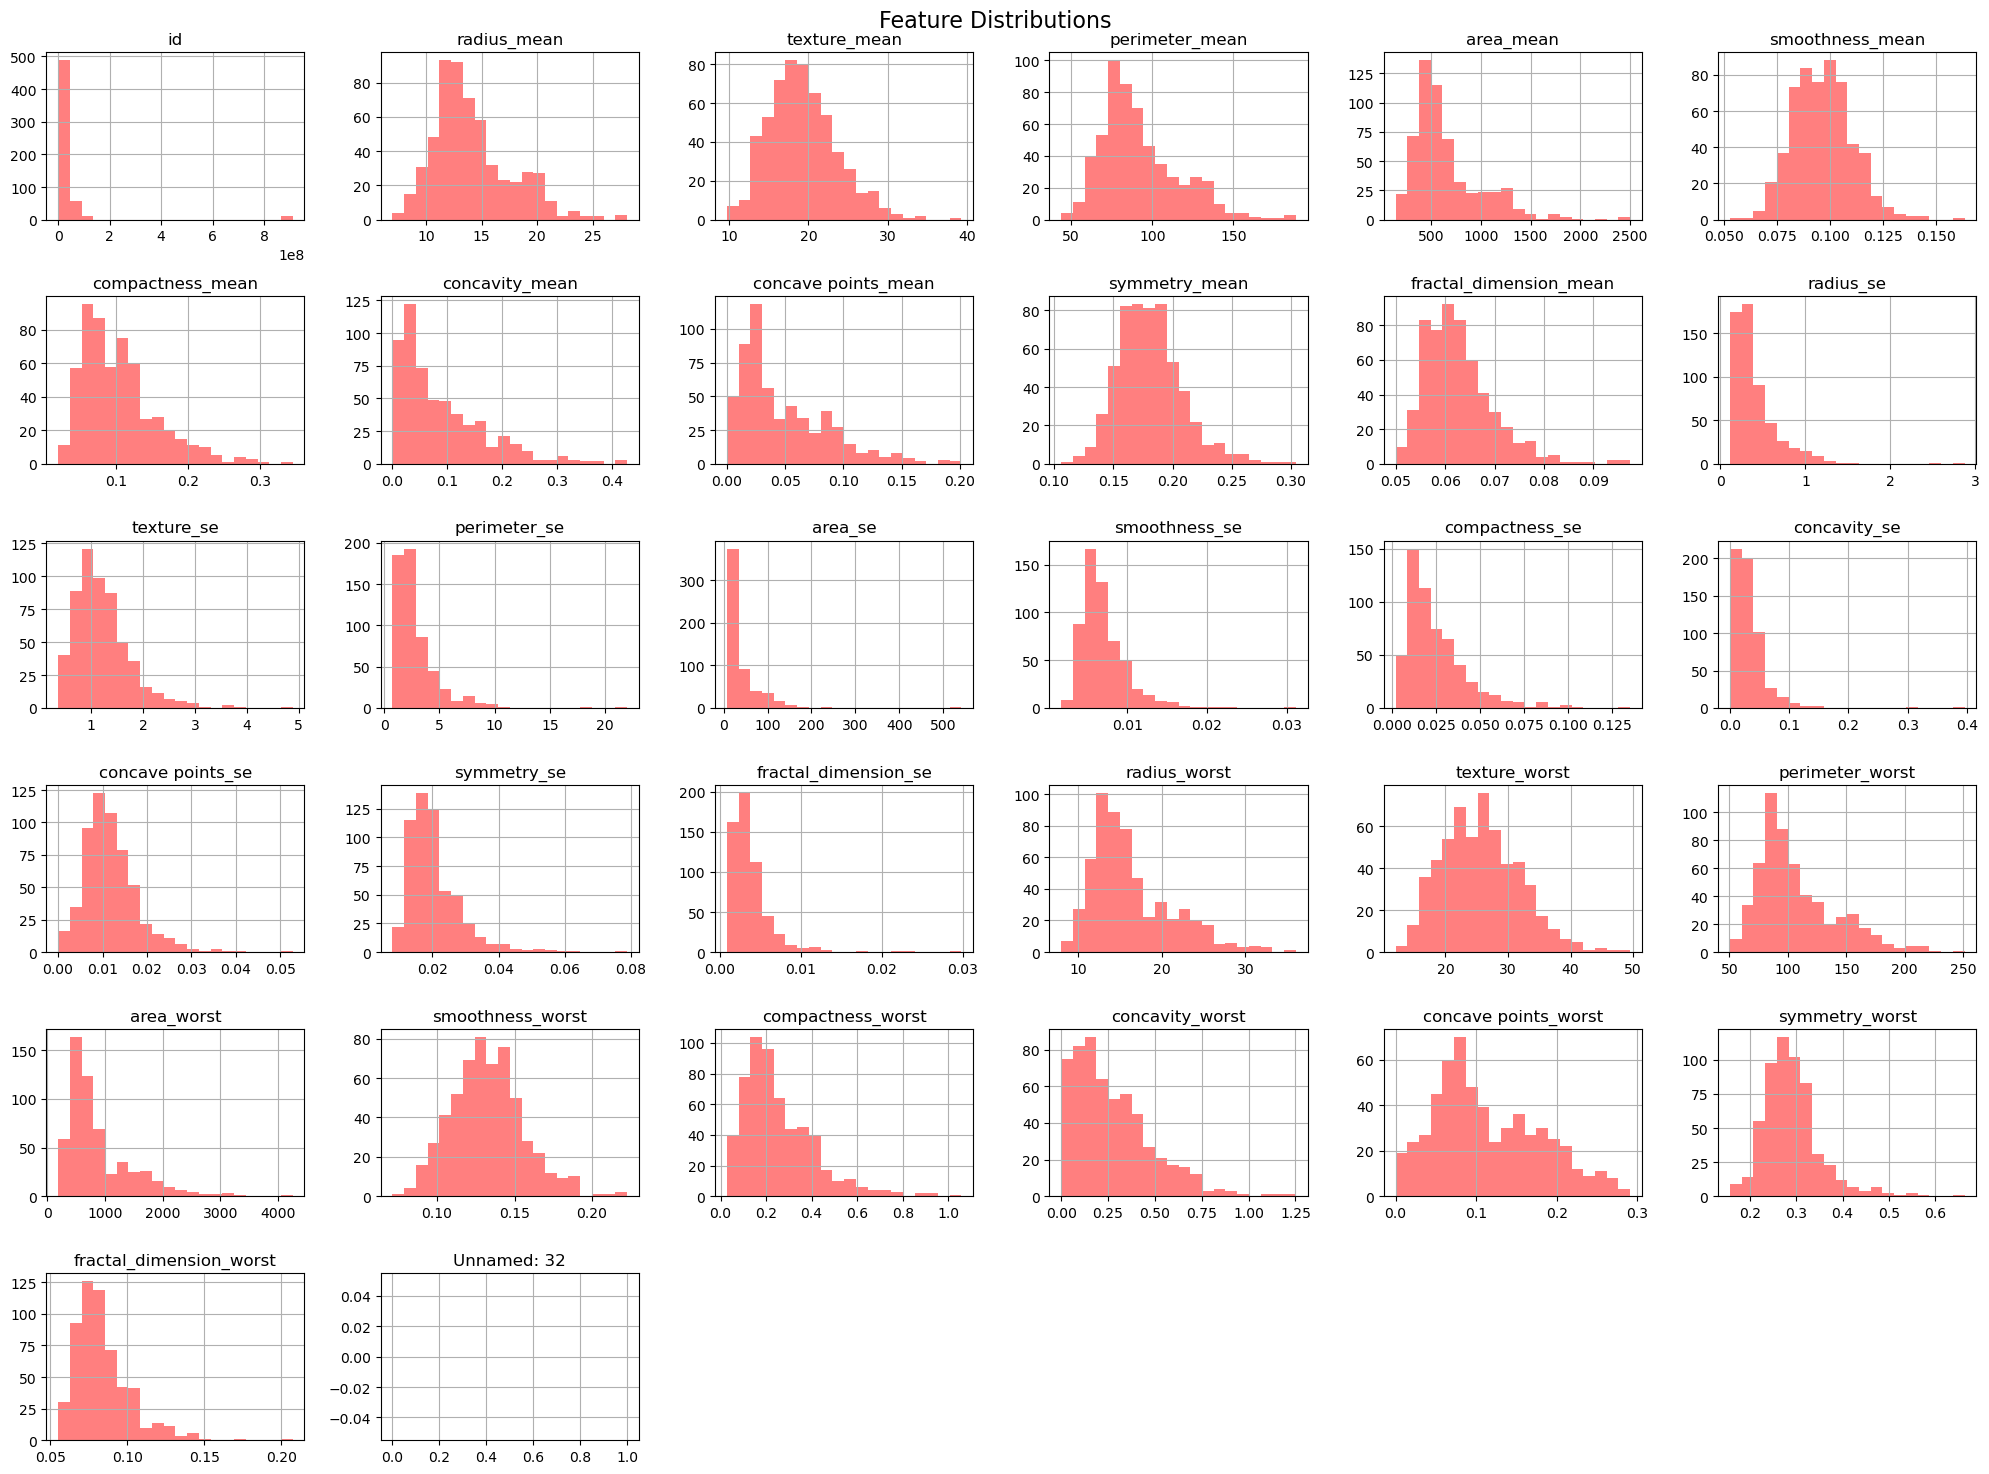

In [18]:
#Check Feature Distributions.

# Plot distributions for malignant cases
plt.figure(figsize=(20, 15))
df.drop(columns=['diagnosis']).hist(bins=20, color='red', alpha=0.5, figsize=(20, 15))
plt.suptitle('Feature Distributions', fontsize=16)
plt.tight_layout()
plt.show()

Skewness can often be identified by looking at the histograms of the features.According to above grapgh right skewness can be observed for some features. Since some models are sentive to skewness and outliers this should be handled before splitting the data to train and test.  

# Data cleaning

In [21]:
#The column "Unnamed: 32" is unnecessary for the analysis because it does not contain any information. 
#Additionally, the ID column is generally not necessary for modeling in machine learning because it does not provide any meaningful information for the prediction task. 

# Drop 'Unnamed: 32' and 'id' columns since they are not useful
df_cleaned = df.drop(columns=['Unnamed: 32', 'id'])

# Check the data types of the columns
df_cleaned.head(5)


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [22]:
# Diagnosis coloumn is objective. Convert this column to numerical values
df_cleaned['diagnosis'] = df_cleaned['diagnosis'].map({'M': 1, 'B': 0})

# Split the data into malignant and benign cases
df_malignant = df_cleaned[df_cleaned['diagnosis'] == 1]
df_benign = df_cleaned[df_cleaned['diagnosis'] == 0]

df_cleaned.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [23]:
# To get summary statistics (mean, min, max, etc.) for numerical columns
df_cleaned.describe()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,16.269190,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946
std,0.483918,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,4.833242,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061
min,0.000000,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,7.930000,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040
25%,0.000000,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,13.010000,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460
50%,0.000000,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,14.970000,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040
75%,1.000000,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,18.790000,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080
max,1.000000,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,36.040000,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500


In [24]:
# Check skewness of all features
df_cleaned.skew()

diagnosis                  0.528461
radius_mean                0.942380
texture_mean               0.650450
perimeter_mean             0.990650
area_mean                  1.645732
smoothness_mean            0.456324
compactness_mean           1.190123
concavity_mean             1.401180
concave points_mean        1.171180
symmetry_mean              0.725609
fractal_dimension_mean     1.304489
radius_se                  3.088612
texture_se                 1.646444
perimeter_se               3.443615
area_se                    5.447186
smoothness_se              2.314450
compactness_se             1.902221
concavity_se               5.110463
concave points_se          1.444678
symmetry_se                2.195133
fractal_dimension_se       3.923969
radius_worst               1.103115
texture_worst              0.498321
perimeter_worst            1.128164
area_worst                 1.859373
smoothness_worst           0.415426
compactness_worst          1.473555
concavity_worst            1

How to Decide Which Features to Transform:
High skewness values (greater than 1 or less than -1) indicate that a feature should be transformed.
Mild skewness (between -1 and 1) may not require transformation, but you can still experiment if needed. Based on the skewness values we considered transforming the following highly skewed features: 

area_se (skewness = 5.45)
concavity_se (skewness = 5.11)
perimeter_se (skewness = 3.44)
radius_se (skewness = 3.09)
fractal_dimension_se (skewness = 3.92)


In [26]:
# Features to transform based on high skewness
features_to_transform = ['area_se', 'concavity_se', 'perimeter_se', 'radius_se', 'fractal_dimension_se']

# Apply log1p (log(1 + x)) transformation
for feature in features_to_transform:
    df_cleaned[feature + '_log'] = np.log1p(df_cleaned[feature])


In [27]:

# Check skewness of the new log-transformed columns
df_cleaned[features_to_transform].skew()

area_se                 5.447186
concavity_se            5.110463
perimeter_se            3.443615
radius_se               3.088612
fractal_dimension_se    3.923969
dtype: float64

In [28]:
df_cleaned.head(5)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,area_se_log,concavity_se_log,perimeter_se_log,radius_se_log,fractal_dimension_se_log
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,0.6656,0.7119,0.2654,0.4601,0.11890,5.039547,0.052336,2.260617,0.739554,0.006174
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,0.1866,0.2416,0.1860,0.2750,0.08902,4.318554,0.018429,1.481150,0.434053,0.003526
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,0.4245,0.4504,0.2430,0.3613,0.08758,4.554193,0.037604,1.720084,0.557098,0.004561
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,0.8663,0.6869,0.2575,0.6638,0.17300,3.340385,0.055066,1.491780,0.402527,0.009166
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,0.2050,0.4000,0.1625,0.2364,0.07678,4.558498,0.055321,1.862218,0.563722,0.005102


In [29]:
# List of the original columns to be removed
columns_to_drop = features_to_transform  # These are the original columns before the log transformation

# Drop the original columns from the DataFrame
df_cleaned = df_cleaned.drop(columns=columns_to_drop)

# Check the DataFrame to ensure columns have been removed
df_cleaned.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,area_se_log,concavity_se_log,perimeter_se_log,radius_se_log,fractal_dimension_se_log
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,0.6656,0.7119,0.2654,0.4601,0.11890,5.039547,0.052336,2.260617,0.739554,0.006174
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,0.1866,0.2416,0.1860,0.2750,0.08902,4.318554,0.018429,1.481150,0.434053,0.003526
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,0.4245,0.4504,0.2430,0.3613,0.08758,4.554193,0.037604,1.720084,0.557098,0.004561
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,0.8663,0.6869,0.2575,0.6638,0.17300,3.340385,0.055066,1.491780,0.402527,0.009166
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,0.2050,0.4000,0.1625,0.2364,0.07678,4.558498,0.055321,1.862218,0.563722,0.005102


In [30]:
# Define the columns to rename
columns_to_rename = {
    'area_se_log': 'area_se',
    'concavity_se_log': 'concavity_se',
    'perimeter_se_log': 'perimeter_se',
    'radius_se_log': 'radius_se',
    'fractal_dimension_se_log': 'fractal_dimension_se'
}
# Renaming the columns in the DataFrame
df_cleaned.rename(columns=columns_to_rename, inplace=True)
# Display the updated column names to verify the changes
df_cleaned.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,area_se,concavity_se,perimeter_se,radius_se,fractal_dimension_se
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,0.6656,0.7119,0.2654,0.4601,0.11890,5.039547,0.052336,2.260617,0.739554,0.006174
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,0.1866,0.2416,0.1860,0.2750,0.08902,4.318554,0.018429,1.481150,0.434053,0.003526
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,0.4245,0.4504,0.2430,0.3613,0.08758,4.554193,0.037604,1.720084,0.557098,0.004561
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,0.8663,0.6869,0.2575,0.6638,0.17300,3.340385,0.055066,1.491780,0.402527,0.009166
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,0.2050,0.4000,0.1625,0.2364,0.07678,4.558498,0.055321,1.862218,0.563722,0.005102


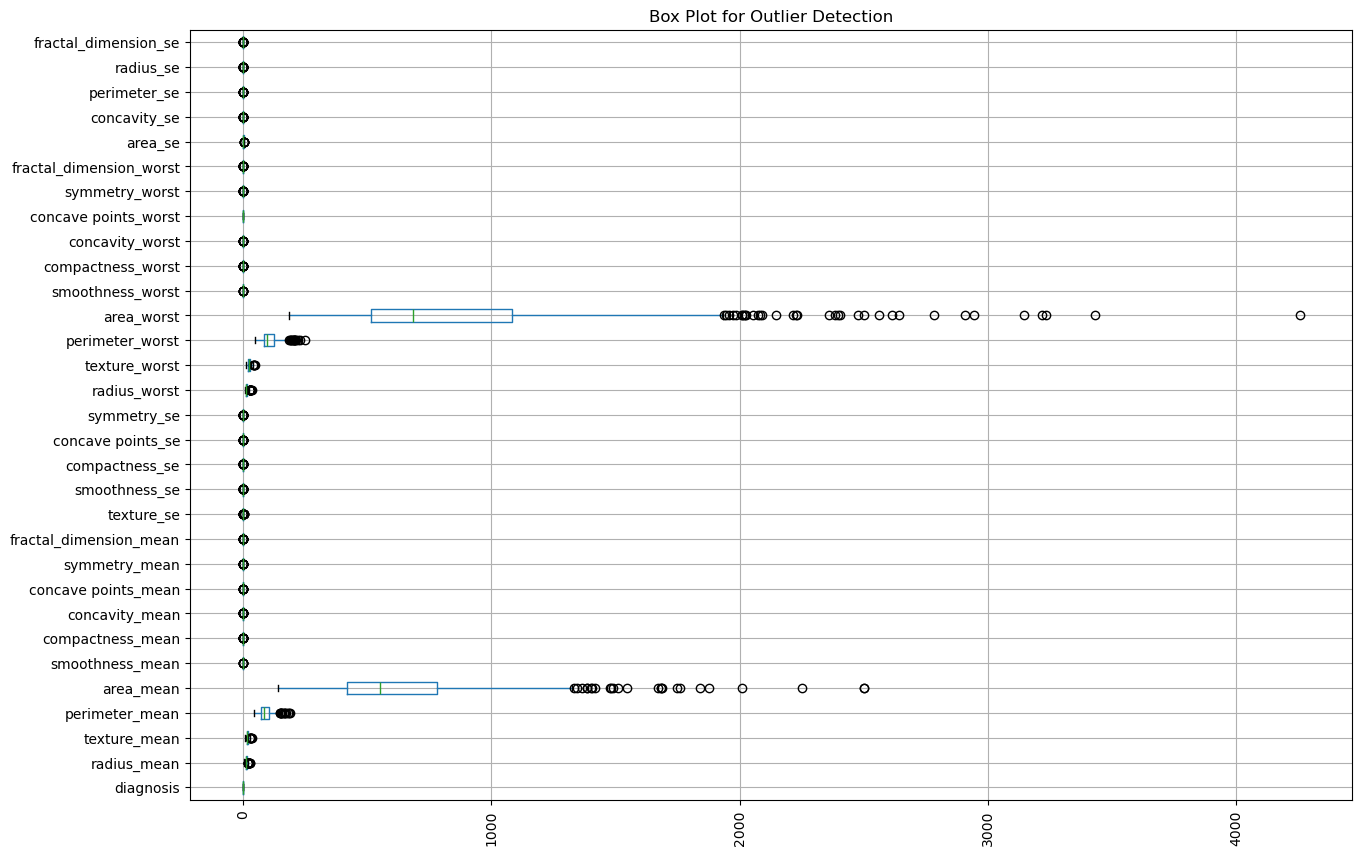

In [31]:
# check outliers and remove or cap. 
# Create boxplots for all the numerical features to detect outliers
df_cleaned.boxplot(figsize=(15, 10), vert=False)
plt.xticks(rotation=90)  # Rotate x-axis labels for readability
plt.title("Box Plot for Outlier Detection")
plt.show()

Features that has major Outliers are 
area_worst
perimeter_worst
area_mean
perimeter_mean

We capped these outliers by replacing values outside the 1st and 99th percentiles with the values at those percentiles.


In [33]:
# Define the features that have major outliers
features_with_outliers = ['area_worst', 'perimeter_worst', 'area_mean', 'perimeter_mean']

# Cap outliers at 1st and 99th percentiles
for feature in features_with_outliers:
    lower_cap = df_cleaned[feature].quantile(0.01)  # 1st percentile
    upper_cap = df_cleaned[feature].quantile(0.99)  # 99th percentile
    
    # Cap the values in the original DataFrame
    df_cleaned[feature] = df_cleaned[feature].clip(lower=lower_cap, upper=upper_cap)

# Check the data after capping outliers
df_cleaned[features_with_outliers].describe()

,area_worst,perimeter_worst,area_mean,perimeter_mean
count,569.000000,569.000000,569.000000,569.000000
mean,876.073835,107.132718,651.295227,91.889771
std,548.004368,33.020473,334.962197,23.752853
min,256.192000,58.270400,215.664000,53.827600
25%,515.300000,84.110000,420.300000,75.170000
50%,686.500000,97.660000,551.100000,86.240000
75%,1084.000000,125.400000,782.700000,104.100000
max,2918.160000,208.304000,1786.600000,165.724000


Use this cleaned data to pplit into Training and Test Sets, scaling and training using different models. 

In [35]:
# Retain the last two rows as unseen data
unseen_data = df_cleaned.tail(2)

# Drop the last two rows from the original DataFrame
df_cleaned = df_cleaned.drop(df_cleaned.tail(2).index)

# Display the unseen data
unseen_data

unseen_data.to_csv('unseen_data.csv', index=False)
print("Unseen data saved as 'unseen_data.csv'")

Unseen data saved as 'unseen_data.csv'


In [36]:
df_cleaned.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,area_se,concavity_se,perimeter_se,radius_se,fractal_dimension_se
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,0.6656,0.7119,0.2654,0.4601,0.11890,5.039547,0.052336,2.260617,0.739554,0.006174
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,0.1866,0.2416,0.1860,0.2750,0.08902,4.318554,0.018429,1.481150,0.434053,0.003526
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,0.4245,0.4504,0.2430,0.3613,0.08758,4.554193,0.037604,1.720084,0.557098,0.004561
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,0.8663,0.6869,0.2575,0.6638,0.17300,3.340385,0.055066,1.491780,0.402527,0.009166
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,0.2050,0.4000,0.1625,0.2364,0.07678,4.558498,0.055321,1.862218,0.563722,0.005102


## Support Vector Machines (SVM) is a supervised learning algorithm primarily used for classification and regression tasks.

In [38]:
# Split data into training and testing
from sklearn.model_selection import train_test_split
X = df_cleaned.drop('diagnosis', axis=1)  
y = df_cleaned['diagnosis']             
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [39]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [40]:
print("Shape of X:", X.shape)
print("Shape of y:", y.shape)

Shape of X: (567, 30)
Shape of y: (567,)


In [41]:
from sklearn.decomposition import PCA
pca = PCA(n_components=9)
X_train_pca = pca.fit_transform(X_scaled)

In [42]:
# Support vector machine linear classifier
from sklearn.svm import SVC 
model = SVC(C=1, kernel='linear', class_weight='balanced', random_state=42) # avoid imbalance model
model.fit(X_train_scaled, y_train)

SVC(C=1, class_weight='balanced', kernel='linear', random_state=42)

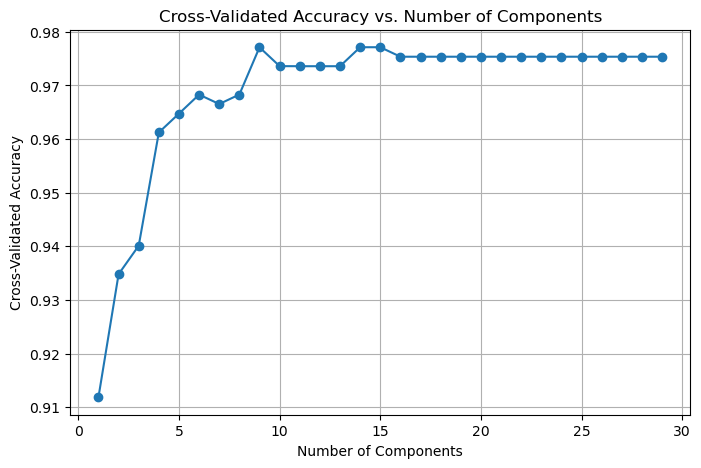

In [43]:
from sklearn.model_selection import cross_val_score

# test components numbers
n_components_range = range(1, 30)
scores = []

for n in n_components_range:
    pca = PCA(n_components=n)
    X_pca = pca.fit_transform(X_scaled)
    score = cross_val_score(SVC(), X_pca, y, cv=5) 
    scores.append(score.mean())

# plot Cross-Validated to get Accuracy point
plt.figure(figsize=(8, 5))
plt.plot(n_components_range, scores, marker='o')
plt.title('Cross-Validated Accuracy vs. Number of Components')
plt.xlabel('Number of Components')
plt.ylabel('Cross-Validated Accuracy')
plt.grid()
plt.show()

In [44]:
# feature importance within PCA
feature_loadings = pd.DataFrame(pca.components_, columns=X.columns)
importance = feature_loadings.abs().sum(axis=0).sort_values(ascending=False)
print("Feature Importance:\n", importance)

Feature Importance:
 concavity_worst            4.450152
concavity_se               4.257706
fractal_dimension_se       4.251578
compactness_se             4.241497
concave points_worst       4.226325
compactness_mean           4.181932
smoothness_worst           4.174896
fractal_dimension_worst    4.145885
concave points_mean        4.104660
concave points_se          4.097733
compactness_worst          4.040627
area_worst                 4.022803
smoothness_mean            4.018795
area_se                    4.015684
radius_se                  3.946007
fractal_dimension_mean     3.912788
symmetry_se                3.907211
symmetry_worst             3.906424
concavity_mean             3.881266
perimeter_se               3.763142
symmetry_mean              3.733755
smoothness_se              3.719864
radius_mean                3.707602
texture_se                 3.554626
area_mean                  3.543347
texture_mean               3.516307
radius_worst               3.513183
perimet

In [45]:
# pip install shap

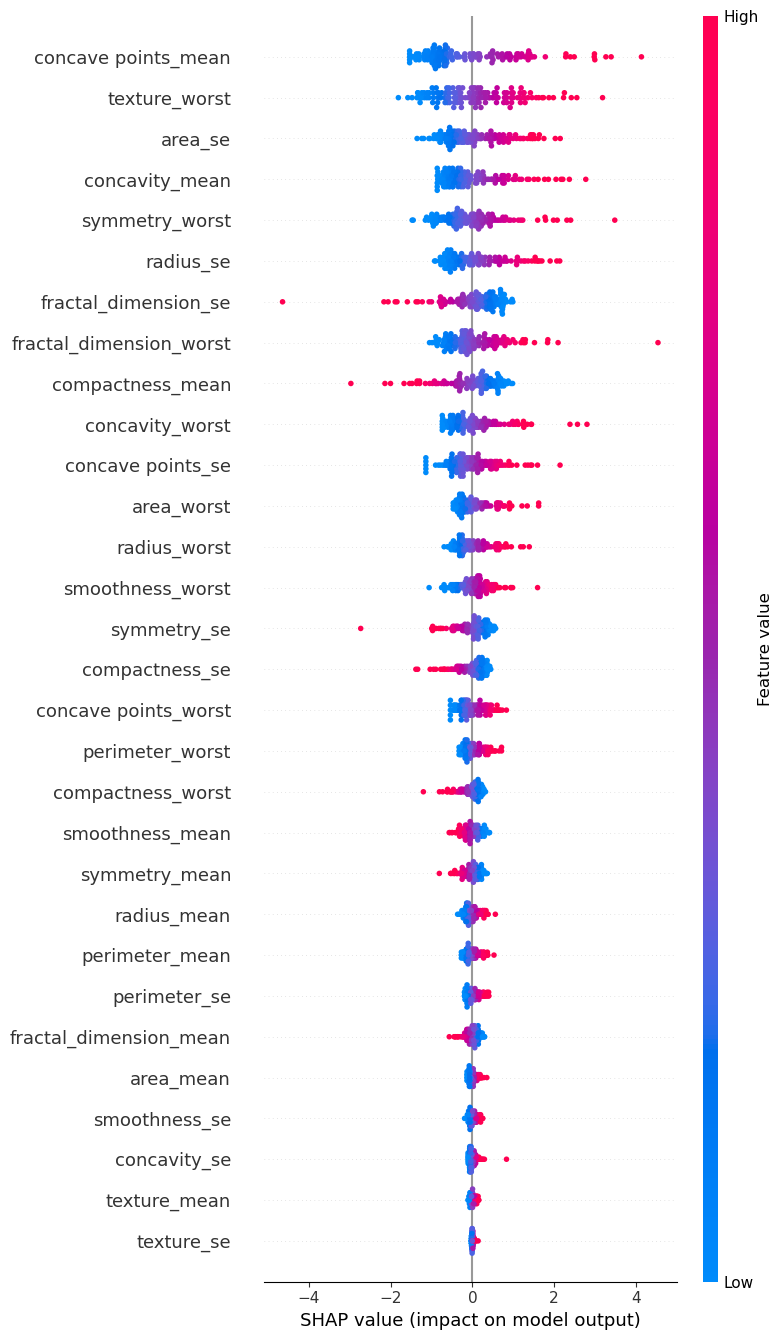

In [46]:
import shap

# Create the SHAP explainer using the scaled training data
explainer = shap.Explainer(model, X_train_scaled)

# Calculate SHAP values for the scaled test data
shap_values = explainer(X_test_scaled)

# Generate the summary plot with the correct feature names
shap.summary_plot(shap_values, X_test_scaled, feature_names=X.columns,max_display=len(X.columns))

In [47]:
print(X.shape)
print(X.columns)

(567, 30)
Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'texture_se', 'smoothness_se', 'compactness_se', 'concave points_se',
       'symmetry_se', 'radius_worst', 'texture_worst', 'perimeter_worst',
       'area_worst', 'smoothness_worst', 'compactness_worst',
       'concavity_worst', 'concave points_worst', 'symmetry_worst',
       'fractal_dimension_worst', 'area_se', 'concavity_se', 'perimeter_se',
       'radius_se', 'fractal_dimension_se'],
      dtype='object')


In [48]:
# Model Accuracy
print('Test Acc: %.3f' % model.score(X_test_scaled, y_test))

Test Acc: 0.965


Confusion Matrix:
[[88  2]
 [ 3 49]]


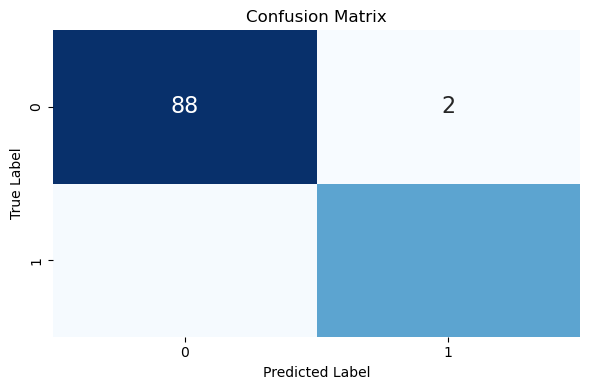

In [49]:
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

predictions = model.predict(X_test_scaled)
# Evaluate the model
print("Confusion Matrix:")
Confusion = confusion_matrix(y_test, predictions)
print(Confusion)
# Create a heatmap to visualize the confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(Confusion, annot=True, fmt="d", cmap="Blues", cbar=False, 
            xticklabels=[0, 1], yticklabels=[0, 1], annot_kws={"size": 16})
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()

In [50]:
# Calculate the classification report
from sklearn.metrics import classification_report

print(classification_report(y_test, predictions,
                            target_names=['1','0']))

              precision    recall  f1-score   support

           1       0.97      0.98      0.97        90
           0       0.96      0.94      0.95        52

    accuracy                           0.96       142
   macro avg       0.96      0.96      0.96       142
weighted avg       0.96      0.96      0.96       142



In [51]:
# Define the parameter grid
param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf'],  
    'gamma': ['scale', 'auto']  
}
# Perform grid search for hyperparameter tuning
grid_search = GridSearchCV(SVC(class_weight='balanced', random_state=42), param_grid, cv=5)
grid_search.fit(X_train_scaled, y_train)

# Output the best parameters
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation score: ", grid_search.best_score_)

Best parameters found:  {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
Best cross-validation score:  0.9788235294117648


In [52]:
# Get the best estimator
tunned_model = grid_search.best_estimator_

# Make predictions
y_pred = tunned_model.predict(X_test_scaled)

In [53]:
# Evaluate predictions
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98        90
           1       0.98      0.94      0.96        52

    accuracy                           0.97       142
   macro avg       0.97      0.97      0.97       142
weighted avg       0.97      0.97      0.97       142



In [54]:
from sklearn.model_selection import cross_val_score
# Evaluate the model
scores = cross_val_score(grid_search.best_estimator_, X_train_scaled, y_train, cv=5)
print("Cross-validation scores: ", scores)
print("Mean CV score: ", scores.mean())

Cross-validation scores:  [0.98823529 0.95294118 1.         0.96470588 0.98823529]
Mean CV score:  0.9788235294117648


Confusion Matrix after Tunning:
[[89  1]
 [ 3 49]]


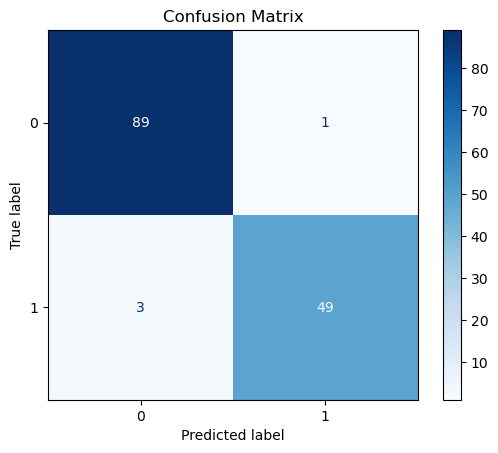

In [55]:
# Evaluate the model
print("Confusion Matrix after Tunning:")
Confusion_tun = confusion_matrix(y_test, y_pred)
print(Confusion_tun)

disp = ConfusionMatrixDisplay(confusion_matrix=Confusion_tun)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()


In [56]:
from sklearn.feature_selection import RFE

# Initialize the SVC model with a linear kernel
svc = SVC(kernel='linear')
# Create the RFE selector, specifying the model and the number of features to select
selector = RFE(svc, n_features_to_select=5)  
# Fit the RFE model to the scaled training data
selector = selector.fit(X_train_scaled, y_train)

# Transform the training and test datasets to select the relevant features
X_train_selected = selector.transform(X_train_scaled)
X_test_selected = selector.transform(X_test_scaled)

# Print the shape of the selected features
print(f"Selected features shape: {X_train_selected.shape}")

Selected features shape: (425, 5)


In [57]:
selected_features_indices = selector.get_support(indices=True)
selected_features_names = [X.columns[i] for i in selected_features_indices]

print(f"Selected feature indices: {selected_features_indices}")
print(f"Selected feature names: {selected_features_names}")

Selected feature indices: [ 7 15 16 23 28]
Selected feature names: ['concave points_mean', 'radius_worst', 'texture_worst', 'symmetry_worst', 'radius_se']


In [58]:
# Fit the tuned model on the selected features
tunned_model.fit(X_train_selected, y_train)
# Make predictions on the test set with the selected features
y_pred_selected = tunned_model.predict(X_test_selected)

In [59]:
from sklearn.metrics import accuracy_score
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred_selected)
print(f"Selected Test Set Accuracy: {accuracy:.4f}")

Selected Test Set Accuracy: 0.9718


Classification Report after select feature:
              precision    recall  f1-score   support

           0       0.97      0.99      0.98        90
           1       0.98      0.94      0.96        52

    accuracy                           0.97       142
   macro avg       0.97      0.97      0.97       142
weighted avg       0.97      0.97      0.97       142

Confusion Matrix after select feature:
[[89  1]
 [ 3 49]]


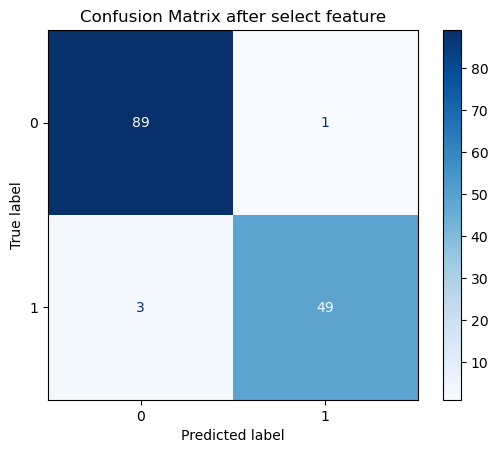

In [60]:
# Print classification report for detailed metrics
print("Classification Report after select feature:")
print(classification_report(y_test, y_pred_selected))

# Confusion Matrix
cm_select = confusion_matrix(y_test, y_pred_selected)
print("Confusion Matrix after select feature:")
print(cm_select)

disp_select = ConfusionMatrixDisplay(confusion_matrix=cm_select)
disp_select.plot(cmap='Blues')
plt.title('Confusion Matrix after select feature')
plt.show()

In [61]:
import joblib
joblib.dump(tunned_model, 'svm_forapp.pkl')

['svm_forapp.pkl']

In [62]:
X_unseen = unseen_data.drop('diagnosis', axis=1)  # Features
y_unseen= unseen_data['diagnosis']  # Target
X_unseen

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,area_se,concavity_se,perimeter_se,radius_se,fractal_dimension_se
567,20.60,29.33,140.1000,1265.000,0.11780,0.27700,0.3514,0.152,0.2397,0.07016,...,0.86810,0.9387,0.265,0.4087,0.12400,4.468434,0.068752,1.912796,0.545807,0.006166
568,7.76,24.54,53.8276,215.664,0.05263,0.04362,0.0000,0.000,0.1587,0.05884,...,0.06444,0.0000,0.000,0.2871,0.07039,3.003204,0.000000,1.266384,0.326205,0.002779


In [63]:
X_unseen.shape

(2, 30)

In [64]:
X_unseen_scaled = scaler.transform(X_unseen)
X_unseen_selected = selector.transform(X_unseen_scaled)

In [65]:
pre = tunned_model.predict(X_unseen_selected)
print(pre)

[1 0]


In [66]:
y_unseen

567    1
568    0
Name: diagnosis, dtype: int64

# yeah!! The prediction is same as the true label!!

In [125]:
joblib.dump(scaler, 'scaler_forapp.pkl')
joblib.dump(selector, 'selector_forapp.pkl')

['selector_forapp.pkl']